In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('height & weight.csv')
df.head()

Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

In [3]:
#check NaN values

df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [4]:
#check size

df.shape

(8555, 3)

<AxesSubplot:xlabel='Weight', ylabel='Count'>

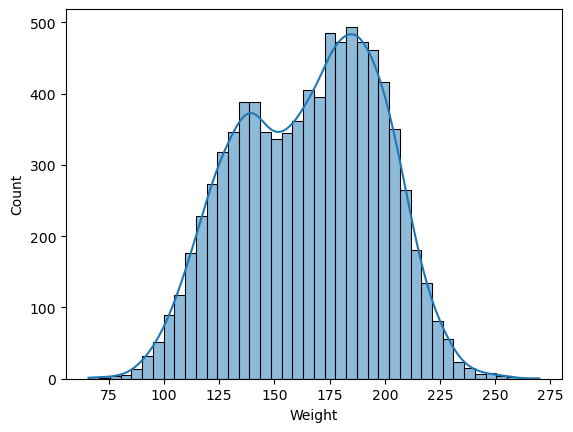

In [5]:
sns.histplot(df['Weight'], kde=True)

In [6]:
mean_value=df['Weight'].mean()
mean_value

165.63273532667586

In [7]:
std_value = df['Weight'].std()
std_value

32.04392221721549

In [8]:
#tof=2.5

std_tof =mean_value+ (2.5+std_value)
std_tof

200.17665754389134

In [9]:
neg_std_tof= mean_value-(2.5*std_value)
neg_std_tof

85.52292978363714

In [10]:
df[df['Weight']>std_tof]

Gender     Height      Weight
0      Male  73.847017  241.893563
2      Male  74.110105  212.740856
3      Male  71.730978  220.042470
4      Male  69.881796  206.349801
11     Male  71.640805  213.741170
...     ...        ...         ...
4976   Male  72.300190  213.229452
4977   Male  74.043290  219.337909
4987   Male  72.616816  224.857902
4989   Male  72.726342  218.766294
4992   Male  71.530978  203.820261

[1268 rows x 3 columns]

In [11]:
df[df['Weight']<neg_std_tof]

Gender     Height     Weight
151     Male  65.350411  65.780000
160     Male  64.333648  68.640000
5026  Female  56.547975  84.872124
5214  Female  56.785434  83.993077
5360  Female  55.668202  68.982530
5740  Female  56.108902  80.531259
6624  Female  54.616858  71.393749
6982  Female  56.764456  79.174376
7294  Female  54.873728  78.606670
7324  Female  56.810317  84.170695
7935  Female  58.211650  77.523774
8180  Female  60.336579  82.198488
8241  Female  56.167299  77.898559

In [12]:
merge = df[(df['Weight']>std_tof) | (df['Weight']< neg_std_tof)]


In [13]:
merge.shape

(1281, 3)

In [14]:
remove_out_columns =df[(df['Weight'] < std_tof) & (df['Weight']> neg_std_tof)]

In [15]:
remove_out_columns.shape

(7274, 3)

<AxesSubplot:xlabel='Weight', ylabel='Count'>

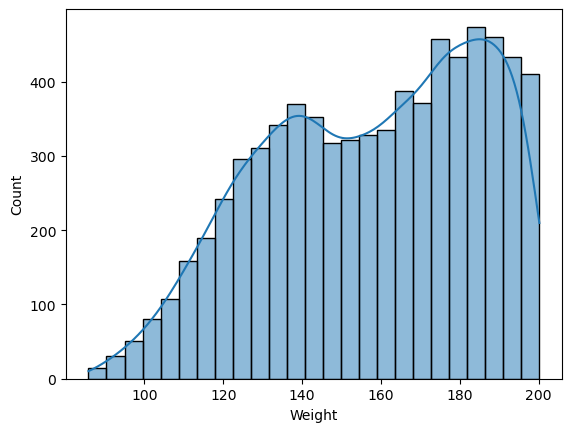

In [16]:
sns.histplot(remove_out_columns['Weight'], kde=True)

In [17]:

#One Hot Encoding

dummy_variables=pd.get_dummies(remove_out_columns['Gender'], drop_first=True)

In [18]:
dummy_variables.head()

Male
1     1
5     1
6     1
7     1
8     1

In [19]:
new_df=remove_out_columns.drop('Gender', axis=1)

In [20]:
new_df.head()

Height      Weight
1  68.781904  162.310473
5  67.253016  152.212156
6  68.785081  183.927889
7  68.348516  167.971111
8  67.018950  175.929440

In [21]:
df=pd.concat([new_df, dummy_variables], axis=1)

In [22]:
df.head()

Height      Weight  Male
1  68.781904  162.310473     1
5  67.253016  152.212156     1
6  68.785081  183.927889     1
7  68.348516  167.971111     1
8  67.018950  175.929440     1

In [23]:
x=df.drop('Height', axis=1)

In [24]:
x.head()

Weight  Male
1  162.310473     1
5  152.212156     1
6  183.927889     1
7  167.971111     1
8  175.929440     1

In [25]:
y=df['Height']

In [26]:
y.head()

1    68.781904
5    67.253016
6    68.785081
7    68.348516
8    67.018950
Name: Height, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y,test_size=.30, random_state=42)

In [29]:
xtrain.shape

(5091, 2)

In [30]:
xtest.shape

(2183, 2)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lre=LinearRegression()

In [33]:
lre.fit(xtrain, ytrain)

LinearRegression()

In [34]:
lre.coef_

array([ 0.12300157, -0.973686  ])

In [35]:
lre.intercept_

46.996997581084244

In [36]:
lre.predict(xtest)

array([64.56423152, 64.62267834, 63.35872004, ..., 64.99245534,
       70.60741517, 63.99430175])

In [37]:
lre.score(xtest, ytest)

0.8146509722740563

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
pred=lre.predict(xtest)

In [40]:
mean_squared_error(ytest,pred)

2.021282375020066

In [41]:
r2_score(ytest,pred)

0.8146509722740563

# KNN Algo

In [43]:
from sklearn.neighbors import KNeighborsRegressor

In [44]:
knn=KNeighborsRegressor(n_neighbors=100)

In [45]:
knn.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=100)

In [47]:
pred2=knn.predict(xtest)

In [49]:
mean_squared_error(ytest,pred2)

2.1040395953891458

In [50]:
r2_score(ytest, pred2)

0.8070622402283626